trying to better understand stellar population synthesis

In [1]:
import fsps
import numpy as np 
# -- fomospec
from fomospec import util as UT
# -- plotting --
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [2]:
sp = fsps.StellarPopulation(zcontinuous=1, sfh=0, logzsol=-1., imf_type=1, dust_type=0, dust_index=0)

(3000.0, 10000.0)

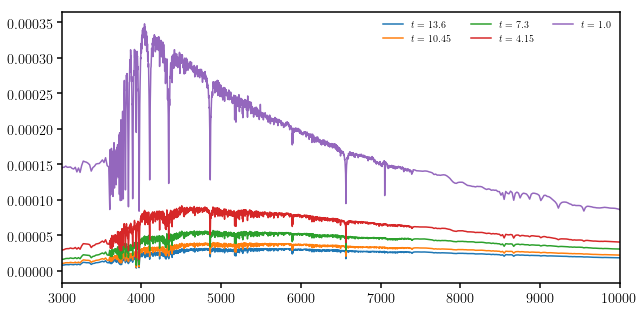

In [3]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for t in np.linspace(1., 13.6, 5)[::-1]: 
    wave, spec = sp.get_spectrum(tage=t, peraa=True)
    sub.plot(wave, spec, label='$t='+str(t)+'$')
sub.legend(loc='upper right', ncol=3, fontsize=10)
sub.set_xlim([3e3, 1e4])

(3000.0, 10000.0)

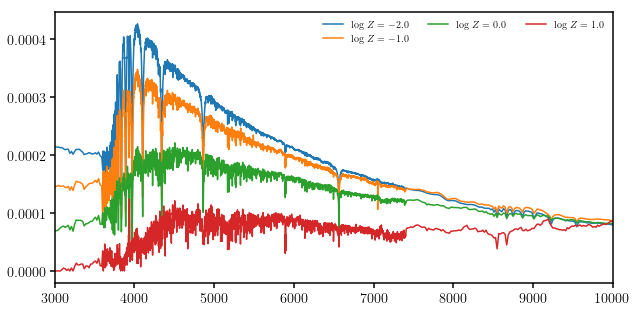

In [4]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for logz in [-2., -1., 0., 1.]: 
    sp.params['logzsol'] = logz
    wave, spec = sp.get_spectrum(tage=1., peraa=True)
    sub.plot(wave, spec, label='$\log\,Z='+str(logz)+'$')
sub.legend(loc='upper right', ncol=3, fontsize=10)
sub.set_xlim([3e3, 1e4])

In [52]:
for i in range(10): 
    wave, spec = sp.get_spectrum(tage=1., peraa=True)
    print spec.max()
    wave, spec = sp.get_spectrum(tage=13., peraa=True)
    print spec.max()

0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05
0.0002209541409278094
1.98461889907722e-05


1.0
0.692803468011514
1.0
0.6928045162014755


(3000.0, 10000.0)

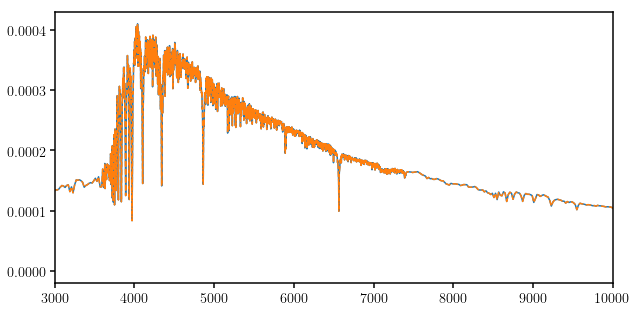

In [104]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sp.params['sfh'] = 0
sp.params['logzsol'] = 0.
wave, spec = sp.get_spectrum(tage=0.6, peraa=True)
print sp.formed_mass
print sp.stellar_mass
sub.plot(wave, spec)#, label='$t='+str(t)+'$')

sp.params['sfh'] = 3
tcosmic = np.array([11., 12., 12.99, 13., 13.01])
sfr = np.array([0., 0., 0., 1., 0.])
sp.set_tabular_sfh(tcosmic, sfr)
wave2, spec2 = sp.get_spectrum(tage=13.6, peraa=True)
print sp.formed_mass
print sp.stellar_mass/(0.01*1e9)
sub.plot(wave2, spec2 /  np.median(spec2) * np.median(spec), ls='--')#, label='$t='+str(t)+'$')
sub.legend(loc='upper right', ncol=3, fontsize=10)
sub.set_xlim([3e3, 1e4])

Now lets compare to Firefly's SSPs...

In [5]:
dir_ssp = ''.join([UT.dat_dir(), 'stellar_population_models/data/SSP_M11_MILES/'])

In [6]:
z_strs = np.array(['z001', 'z002', 'z004', 'z0001.bhb', 'z0001.rhb', 'z10m4.bhb', 'z10m4.rhb'])
z = np.array([0.5, 1.0, 2.0, 10**-1.301, 10**-1.302, 10**-2.301, 10**-2.302])

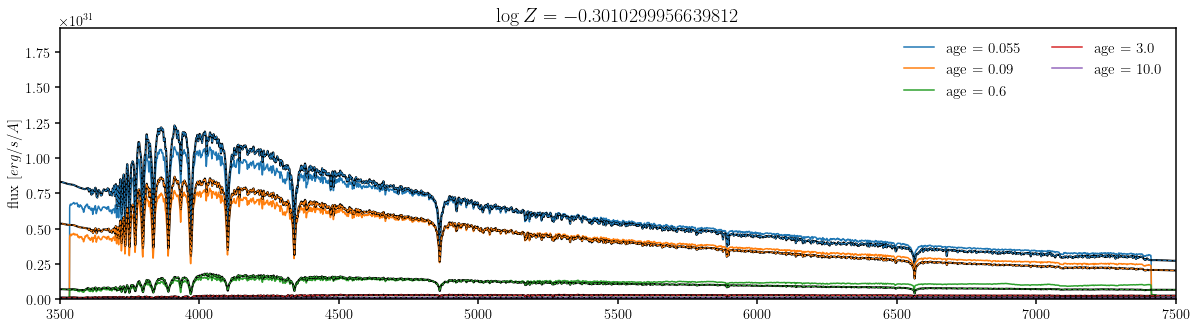

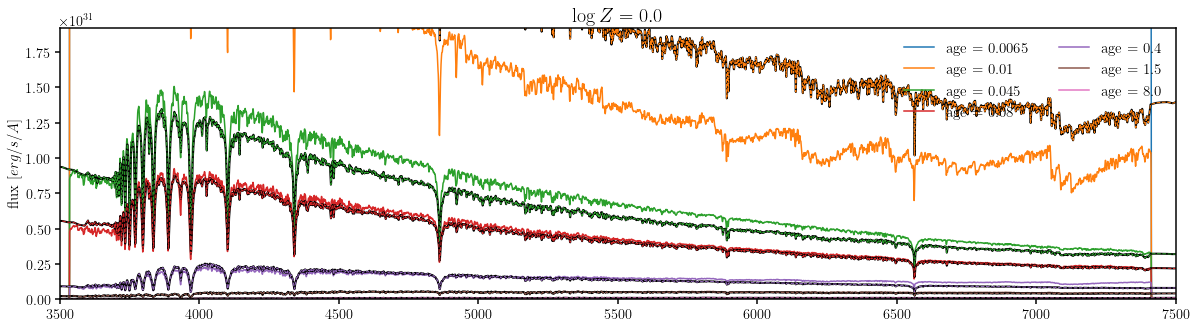

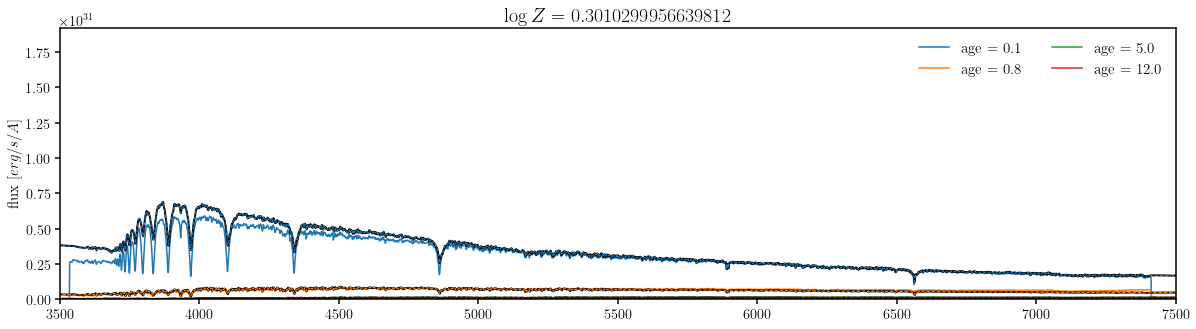

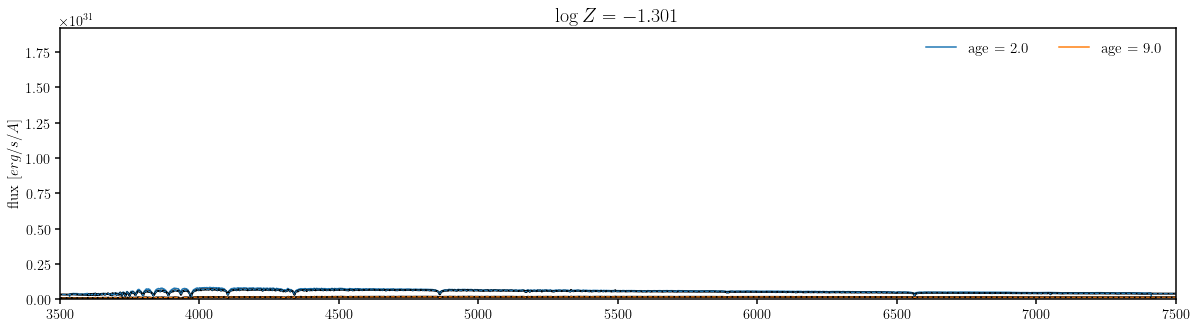

In [117]:
sp.params['sfh'] = 0
for i_z in range(4): 
    f_ssp = ''.join([dir_ssp, 'ssp_M11_MILES.cha', z_strs[i_z]])
    age_m, wave_m, flux_m = np.loadtxt(f_ssp, unpack=True, usecols=[0,2,3])
    
    sp.params['logzsol'] = np.log10(z[i_z])

    fig = plt.figure(figsize=(20,5))
    sub = fig.add_subplot(111)
    for i_a, age in enumerate(np.unique(age_m)[::7]): 
        if age > 13.6: continue
        isage = (age_m == age)
        wave, spec = sp.get_spectrum(tage=age, peraa=True)
        sub.plot(wave_m[isage], flux_m[isage], c='C'+str(i_a), label='age = '+str(age)) 
        sub.plot(wave, spec * UT.Lsun(), ls='-', lw=2, c='k')
        sub.plot(wave, spec * UT.Lsun(), ls='--', lw=1, c='C'+str(i_a))

    sub.legend(loc='upper right', ncol=2, fontsize=15)
    sub.set_xlim([3500., 7.5e3])
    sub.set_ylim([0., 0.005*UT.Lsun()])
    sub.set_ylabel("flux [$erg/s/A$]", fontsize=15)
    sub.set_title('$\log Z = '+str(np.log10(z[i_z]))+'$', fontsize=20)